In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [13]:
airline_data = pd.read_csv("airline_passengers.csv",index_col = 'Month',parse_dates = True)

In [ ]:
airline_data.isna().sum()

In [ ]:
airline_data.head()

In [ ]:
airline_data.plot()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

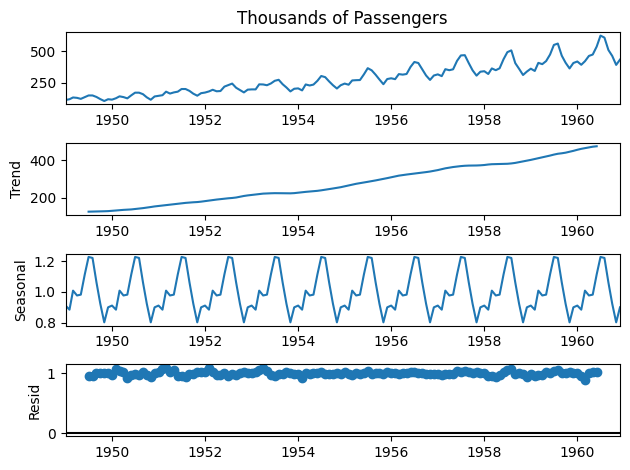

In [19]:
result = seasonal_decompose(airline_data['Thousands of Passengers'], model = 'multiplicative')
result.plot();

In [ ]:
TS = Trend * seas * Re (MUL)
TS = Trend + seas + RE

In [21]:
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
airline_data['6-month-SMA'] = airline_data['Thousands of Passengers'].rolling(window = 6).mean()

In [26]:
airline_data.head(7) #1949-06-01 6th value = (112+118+132+129+121+135/6_

,Thousands of Passengers,6-month-SMA
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.5
1949-07-01,148,130.5


In [27]:
airline_data['12-month-SMA'] = airline_data['Thousands of Passengers'].rolling(window = 12).mean()

In [28]:
airline_data

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


<Axes: xlabel='Month'>

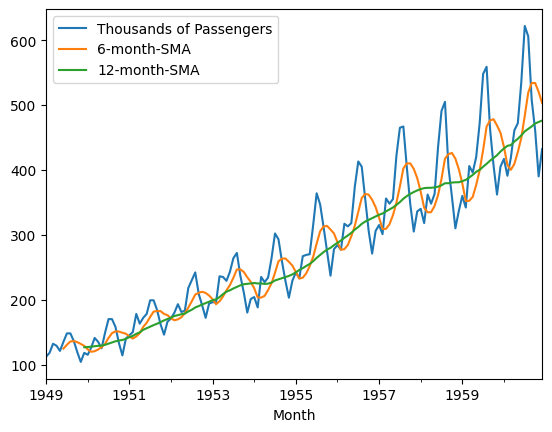

In [29]:
airline_data.plot()

In [30]:
airline_data['EMA12'] = airline_data['Thousands of Passengers'].ewm(span = 12, adjust = False).mean()

<Axes: xlabel='Month'>

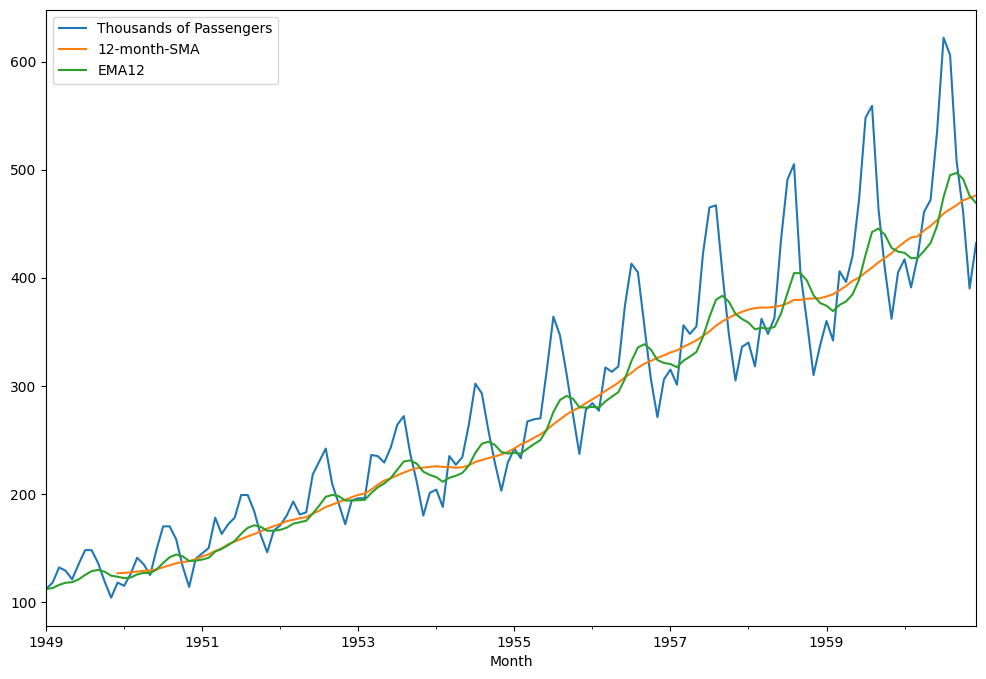

In [32]:
airline_data[['Thousands of Passengers','12-month-SMA','EMA12']].plot(figsize = (12,8))

In [33]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

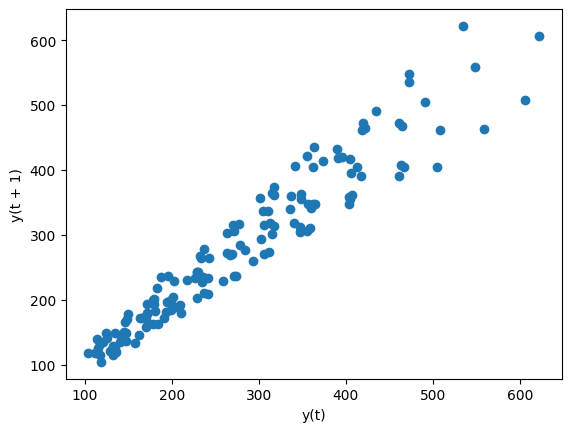

In [34]:
lag_plot(airline_data['Thousands of Passengers'])

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

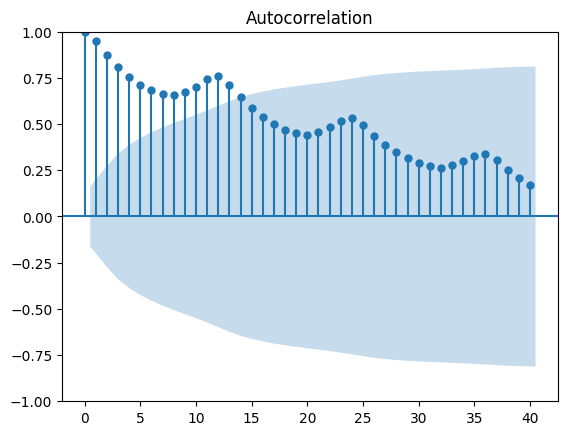

In [39]:
plot_acf(airline_data['Thousands of Passengers'],lags = 40);

In [37]:
femaleBirths = pd.read_csv("DailyTotalFemaleBirths.csv")

In [38]:
femaleBirths.head()

,Date,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


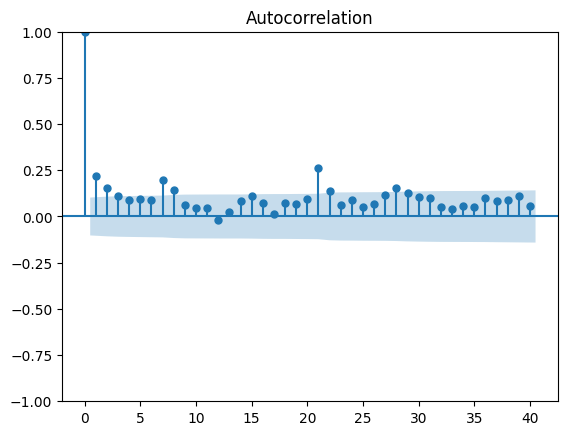

In [40]:
plot_acf(femaleBirths['Births'],lags = 40);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


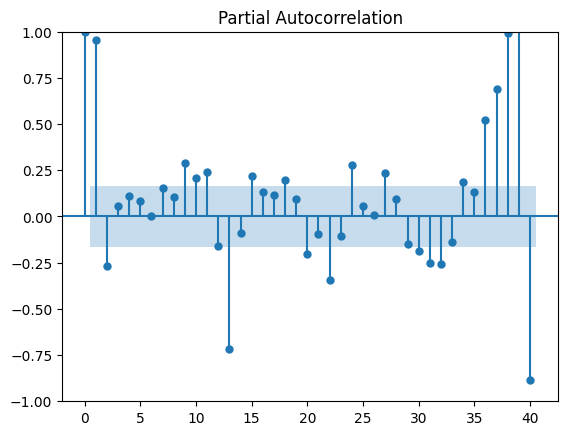

In [42]:
#PACF
plot_pacf(airline_data['Thousands of Passengers'],lags = 40);

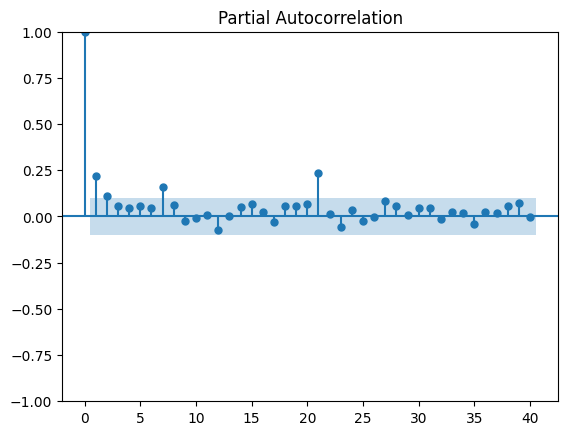

In [43]:
#PACF
plot_pacf(femaleBirths['Births'],lags = 40);